<a href="https://colab.research.google.com/github/leynessa/ds_projects/blob/main/PUC_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fracture Detection in X-ray Images using Data Augmentation for improvement of model**



## **Abstract**
This project aims to develop a robust machine learning model for detecting fractures in X-ray images, leveraging data augmentation techniques to improve model performance. Using the EfficientNetB0 architecture, various augmentation strategies were employed and evaluated to understand their impact on the model’s accuracy and generalization. The dataset was split into training, validation, and testing subsets, and the results demonstrated the effectiveness of specific augmentations in enhancing the model’s capability to detect fractures.


## **Introduction**
Fracture detection in X-ray images is a critical application of artificial intelligence in medical imaging. However, the limited availability of annotated datasets presents a significant challenge for training deep learning models. Data augmentation, a technique to artificially increase dataset diversity, has been widely adopted to address this issue. This project explores the impact of different augmentation techniques on the performance of a fracture detection model built using EfficientNetB0.


### **Dataset**
The dataset consists of 4,083 X-ray images divided into two classes:
•	Fractured
•	Non-Fractured
### **Data Distribution:**
•	Training Set: 2,448 images
•	Validation Set: 817 images
•	Test Set: 818 images


# **Project Definition & Goal**

**Goal**: Build a machine learning model to detect fractures in X-ray images.

**Focus**: Data augmentation to improve model generalization and robustness.

**Output:** A binary classification model that labels X-ray images as "fracture" or "non fracture"

## **Model Architecture**
The EfficientNetB0 architecture was chosen for its efficiency and high performance on image classification tasks. The model was modified for binary classification (fracture vs. non-fracture).



# **Data Augmentation Techniques**

Data augmentation techniques play a critical role in enhancing the diversity and quality of datasets for machine learning models. Basic augmentation techniques include geometric transformations such as rotation, scaling, translation, reflection, shearing, and perspective changes. These methods can also involve cropping, where random patches are selected, or occlusion, which simulates incomplete images by removing parts of them. Intensity operations, such as brightness adjustment, contrast modification, and gamma correction, are also commonly used. Additionally, noise injection techniques introduce Gaussian or salt-and-pepper noise to simulate real-world imperfections, while filtering methods like sharpening, blurring, or smoothing are applied to alter image quality.

Deformable augmentation techniques extend the basic methods by introducing randomized displacement fields, which apply elastic deformations using Gaussian filters. Spline interpolation creates smooth deformations through mathematical functions, and deformable image registration aligns images from different modalities, such as CT and MRI. Another advanced approach is statistical shape modeling, which generates augmentations based on learned anatomical variations.

Deep learning-based techniques further expand the possibilities for augmentation. Generative Adversarial Networks (GANs), such as CycleGAN and Pix2Pix, synthesize realistic images, while variational autoencoders create diverse yet plausible variations. Domain adaptation methods translate images between modalities, like converting CT scans to MRI images, and adversarial learning introduces challenging variations to improve model robustness.

Other augmentation techniques include artifact simulation, where motion or imaging artifacts are introduced to mimic real-world conditions, and parameter variation, which adjusts scanner-specific properties like slice thickness or energy spectra. These advanced techniques ensure that models are trained on data that closely resembles real-world scenarios, improving their performance and generalizability.

# **Methodology**
The methodology for this project involved three key phases: data preparation, augmentation experiments, and model training.

## **1. Data Preparation**
Images in the dataset were resized to a consistent dimension of 224x224 pixels to match the input size requirement of the EfficientNetB0 model. The dataset was then divided into three subsets: training, validation, and test sets, ensuring proper data distribution for model development and evaluation.

2. Augmentation Experiments
To enhance dataset diversity and evaluate the impact of various augmentation techniques, multiple strategies were applied using TensorFlow\u2019s ImageDataGenerator and the Albumentations library. Each augmentation technique was tested individually by training the model separately with that specific method. This allowed for a detailed analysis of how each augmentation type influenced the model's performance.

## **3. Model Training**
The model was trained using the Adam optimizer with a learning rate of 1e-4. Binary cross-entropy was used as the loss function, and accuracy was employed as the primary evaluation metric. To improve the efficiency and robustness of the training process, callbacks such as EarlyStopping, to prevent overfitting, and ModelCheckpoint, to save the best-performing model, were implemented.

This structured approach ensured a comprehensive evaluation of data augmentation techniques and their impact on model performance.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python matplotlib scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import torch
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
import os

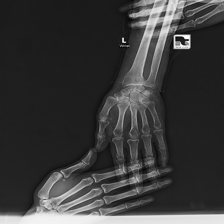

In [4]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/atlas/images/Fractured/IMG0000019.jpg')
resized = img.resize((224, 224))
resized

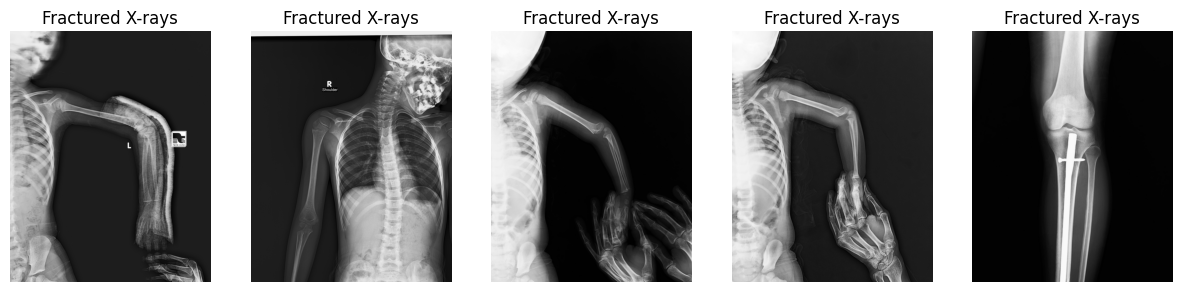

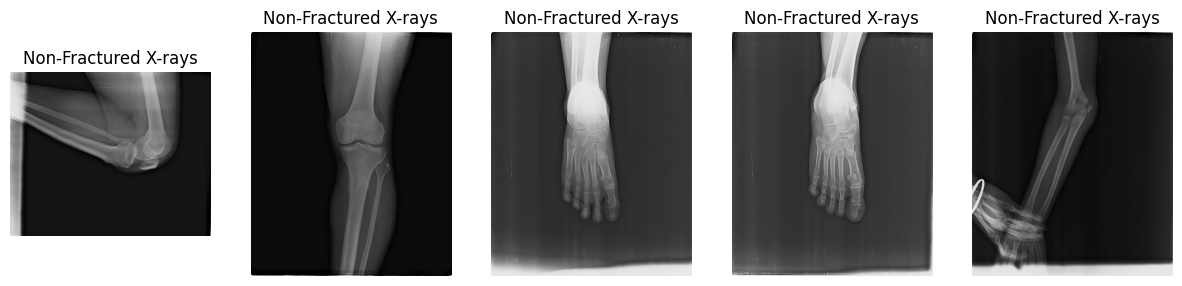

In [5]:
# Define paths to folders
fractured_path = "/content/drive/MyDrive/atlas/images/Fractured"
non_fractured_path = "/content/drive/MyDrive/atlas/images/Non_fractured"

# Visualize images
def visualize_images(folder_path, title, num_images=5):
    images = os.listdir(folder_path)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(images):
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

# Show samples
visualize_images(fractured_path, "Fractured X-rays")
visualize_images(non_fractured_path, "Non-Fractured X-rays")

In [6]:
!pip install pycocotools

loading annotations into memory...
Done (t=0.78s)
creating index...
index created!


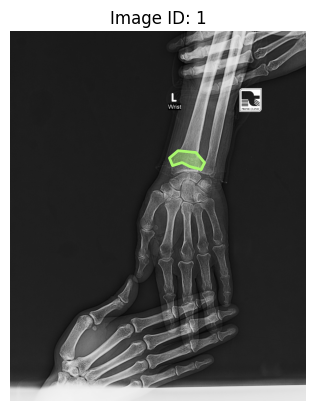

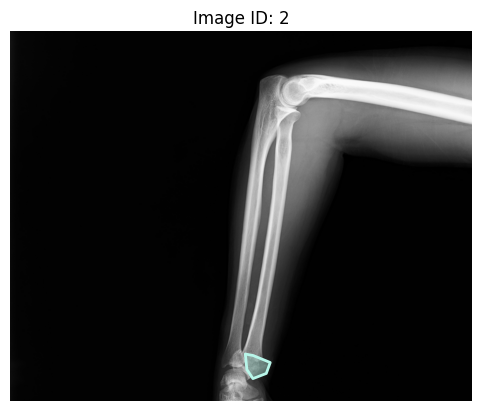

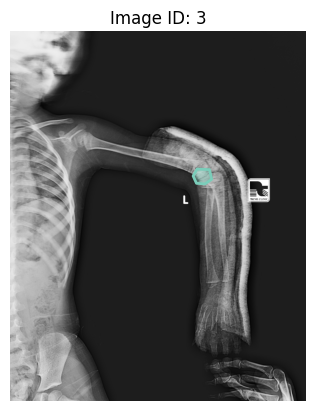

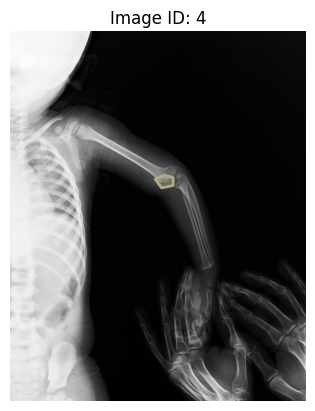

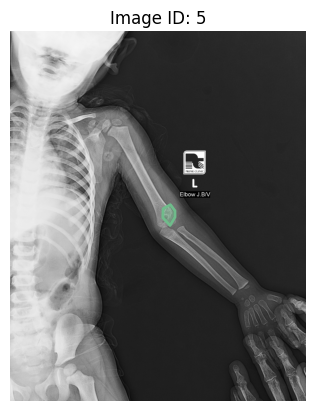

In [7]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os

# Load COCO annotations
coco = COCO("/content/drive/MyDrive/atlas/Annotations/COCO_JSON/COCO_fracture_masks.json")

# Visualize an image with annotations
def visualize_coco(image_folder, image_id):
    # Get image info
    img_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join(image_folder, img_info['file_name'])

    # Load and prepare image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image ID: {image_id}")

    # Load and show annotations
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)
    coco.showAnns(anns)
    plt.show()

# Visualize the first 20 images
def visualize_multiple_images(image_folder, num_images=20):
    image_ids = list(coco.getImgIds())[:num_images]
    for image_id in image_ids:
        visualize_coco(image_folder, image_id)

# Example usage
image_folder_fractured = "/content/drive/MyDrive/atlas/images/Fractured"
image_folder_nonfractured = "/content/drive/MyDrive/atlas/images/Non_fractured"
visualize_multiple_images(image_folder_fractured, num_images=5)

In [8]:
visualize_multiple_images(image_folder_nonfractured, num_images=5)

Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000019.jpg
Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000025.jpg
Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000044.jpg
Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000057.jpg
Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000058.jpg


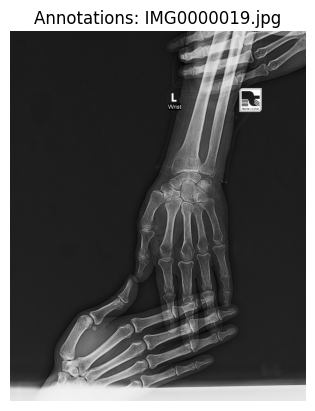

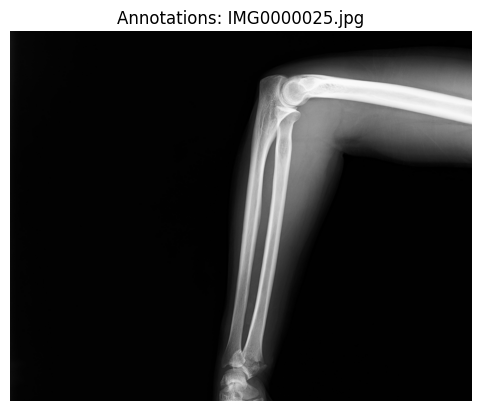

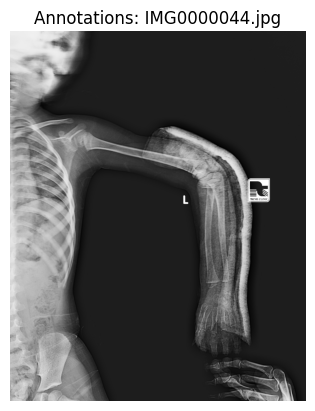

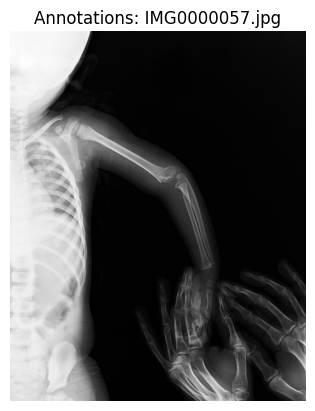

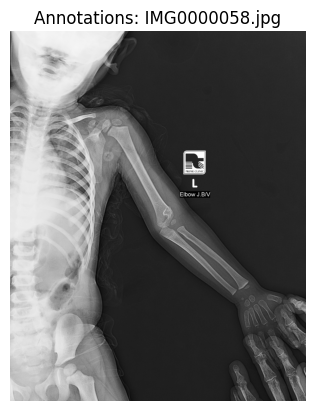

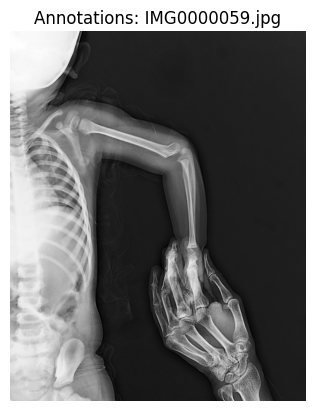

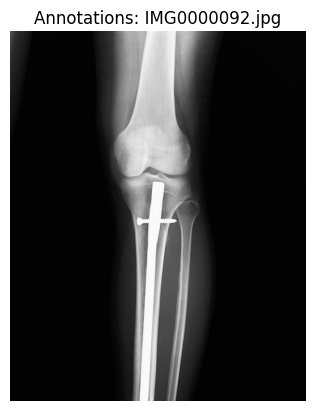

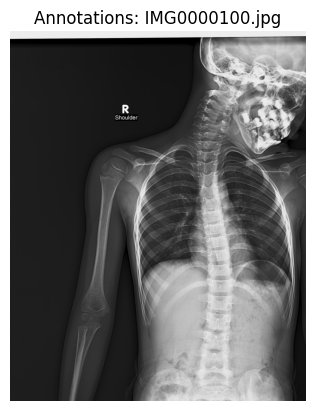

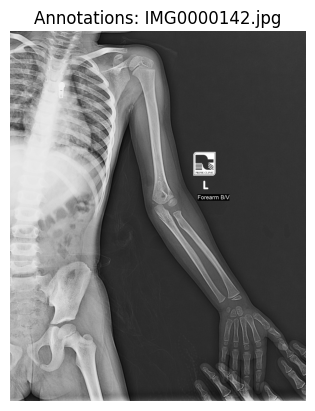

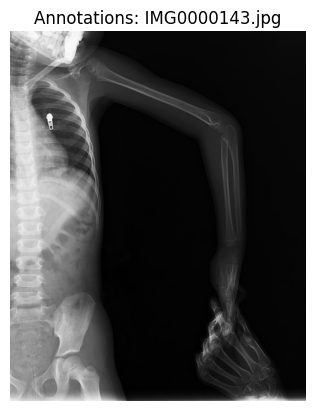

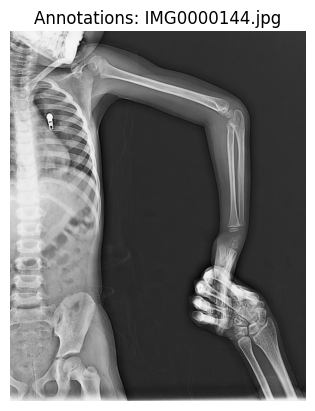

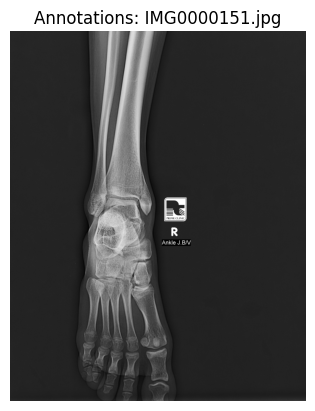

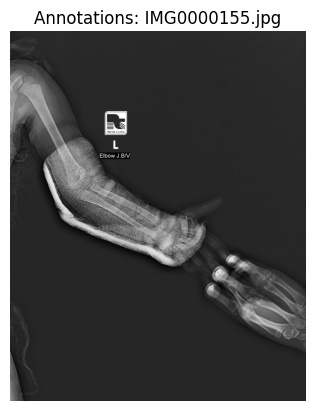

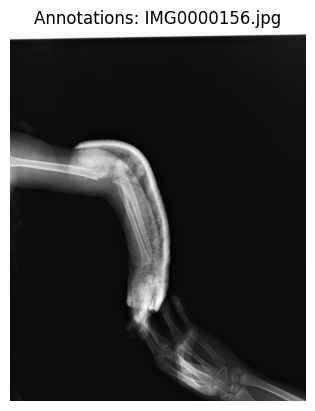

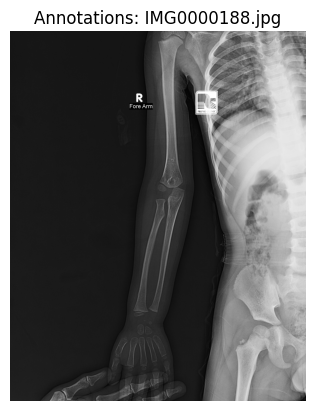

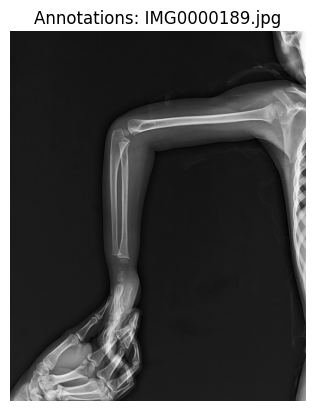

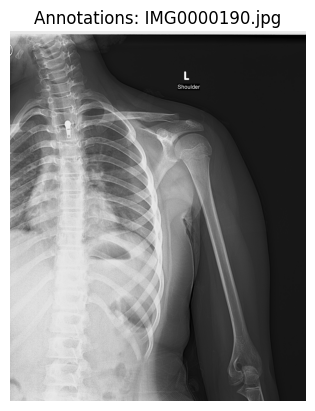

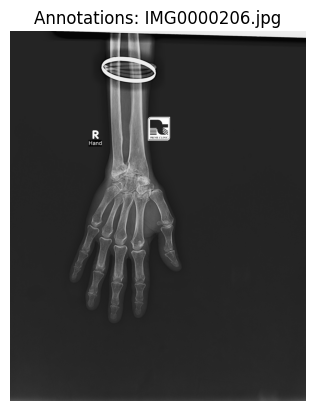

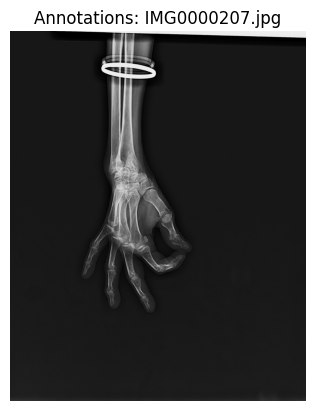

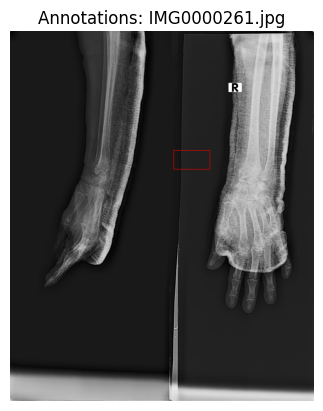

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to parse YOLO annotations
def parse_yolo(annotation_path, image_shape):
    boxes = []
    with open(annotation_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            class_id, x_center, y_center, width, height = map(float, parts)
            x_center *= image_shape[1]
            y_center *= image_shape[0]
            width *= image_shape[1]
            height *= image_shape[0]
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)
            boxes.append((xmin, ymin, xmax, ymax))
    return boxes

# Function to visualize annotations
def visualize_yolo(image_path, annotation_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    boxes = parse_yolo(annotation_path, img.shape)

    for (xmin, ymin, xmax, ymax) in boxes:
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Annotations: {os.path.basename(image_path)}")
    plt.show()

# Visualize annotations for multiple images
def visualize_multiple_images(image_folder, annotation_folder, num_images=20):
    image_files = sorted(os.listdir(image_folder))[:num_images]
    annotation_files = sorted(os.listdir(annotation_folder))[:num_images]

    for img_file, ann_file in zip(image_files, annotation_files):
        image_path = os.path.join(image_folder, img_file)
        annotation_path = os.path.join(annotation_folder, ann_file)
        visualize_yolo(image_path, annotation_path)

# Example usage
image_folder = "/content/drive/MyDrive/atlas/images/Fractured"
annotation_folder = "/content/drive/MyDrive/atlas/Annotations/YOLO"
visualize_multiple_images(image_folder, annotation_folder, num_images=20)


In [10]:
data=  pd.read_csv('/content/drive/MyDrive/atlas/dataset.csv')

In [11]:
data.head(20)

,image_id,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique
0,IMG0000000.jpg,0,1,0,0,0,0,1,0,0,1,1,0
1,IMG0000001.jpg,0,1,0,0,0,0,1,0,0,1,1,0
2,IMG0000002.jpg,0,1,0,0,0,0,1,0,0,1,1,0
3,IMG0000003.jpg,0,1,0,0,0,0,1,0,0,0,1,1
4,IMG0000004.jpg,0,1,0,0,0,0,1,0,0,0,1,1
5,IMG0000005.jpg,0,1,0,0,0,0,1,0,0,0,1,1
6,IMG0000006.jpg,1,0,0,0,0,0,1,0,0,0,1,1
7,IMG0000007.jpg,1,0,0,0,0,0,0,0,0,0,0,1
8,IMG0000008.jpg,0,1,0,0,0,0,1,0,0,0,1,1
9,IMG0000009.jpg,0,1,0,0,0,0,0,0,0,0,0,1


 Splitting the Data

In [12]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Paths to fractured and non-fractured folders
fractured_path = "/content/drive/MyDrive/atlas/images/Fractured"
non_fractured_path = "/content/drive/MyDrive/atlas/images/Non_fractured"

# Create new folders for train, validation, and test
base_dir = "/content/drive/MyDrive/atlas/split_data"
os.makedirs(base_dir, exist_ok=True)

for subset in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_dir, subset, 'fractured'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, subset, 'non_fractured'), exist_ok=True)

# Helper function to split and copy files
def split_and_copy(files, dest_dir):
    for file in files:
        shutil.copy(file, dest_dir)

# Get all file paths
fractured_files = [os.path.join(fractured_path, f) for f in os.listdir(fractured_path)]
non_fractured_files = [os.path.join(non_fractured_path, f) for f in os.listdir(non_fractured_path)]

# Split files
fractured_train, fractured_test = train_test_split(fractured_files, test_size=0.2, random_state=42)
fractured_train, fractured_val = train_test_split(fractured_train, test_size=0.25, random_state=42)  # 20% val

non_fractured_train, non_fractured_test = train_test_split(non_fractured_files, test_size=0.2, random_state=42)
non_fractured_train, non_fractured_val = train_test_split(non_fractured_train, test_size=0.25, random_state=42)

# Copy files to respective folders
split_and_copy(fractured_train, os.path.join(base_dir, 'train', 'fractured'))
split_and_copy(fractured_val, os.path.join(base_dir, 'val', 'fractured'))
split_and_copy(fractured_test, os.path.join(base_dir, 'test', 'fractured'))

split_and_copy(non_fractured_train, os.path.join(base_dir, 'train', 'non_fractured'))
split_and_copy(non_fractured_val, os.path.join(base_dir, 'val', 'non_fractured'))
split_and_copy(non_fractured_test, os.path.join(base_dir, 'test', 'non_fractured'))




In [13]:
# Count files in each folder
for subset in ['train', 'val', 'test']:
    fractured_count = len(os.listdir(os.path.join(base_dir, subset, 'fractured')))
    non_fractured_count = len(os.listdir(os.path.join(base_dir, subset, 'non_fractured')))
    print(f"{subset.capitalize()} set: {fractured_count} fractured, {non_fractured_count} non-fractured")

Train set: 429 fractured, 2019 non-fractured
Val set: 144 fractured, 673 non-fractured
Test set: 144 fractured, 674 non-fractured


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load train, validation, and test data
train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # For consistent predictions during evaluation
)




Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Found 818 images belonging to 2 classes.


In [15]:
"Define the Model"
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load EfficientNet base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Regularization
output = Dense(1, activation='sigmoid')(x)  # Binary classification (fracture vs non-fracture)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 4,008,829 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

None


In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('efficientnet_best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_gen,
    epochs=300,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint],
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=val_gen.samples // val_gen.batch_size
)

Epoch 1/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 65s 794ms/step - accuracy: 0.8747 - loss: 0.2924 - val_accuracy: 0.7850 - val_loss: 0.4524
Epoch 2/300
 1/76 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.9375 - loss: 0.2315

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9375 - loss: 0.2315 - val_accuracy: 0.6471 - val_loss: 0.5209
Epoch 3/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 65s 775ms/step - accuracy: 0.9074 - loss: 0.2372 - val_accuracy: 0.8163 - val_loss: 0.3932
Epoch 4/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8438 - loss: 0.3468 - val_accuracy: 0.6471 - val_loss: 0.5484
Epoch 5/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 64s 790ms/step - accuracy: 0.9097 - loss: 0.2257 - val_accuracy: 0.8725 - val_loss: 0.3351
Epoch 6/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9375 - loss: 0.1746 - val_accuracy: 0.8824 - val_loss: 0.2079
Epoch 7/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 791ms/step - accuracy: 0.9119 - loss: 0.2116 - val_accuracy: 0.8687 - val_loss: 0.3855
Epoch 8/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9062 - loss: 0.3097 - val_accuracy: 0.8235 - val_loss: 0.6451
Epoch 9/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 77s 766ms/step - accuracy: 0.9260 - loss: 0.1907 - val_accuracy: 0.8813

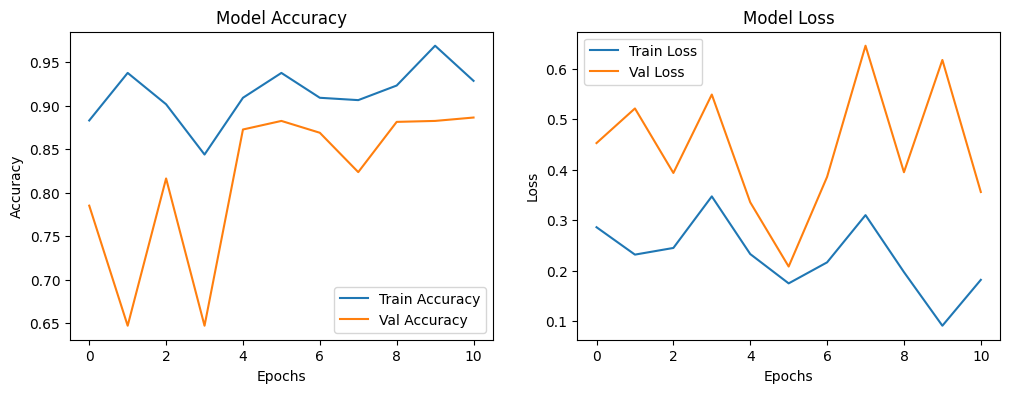

In [28]:
# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)


In [29]:
import numpy as np

# Reset test generator to ensure predictions are aligned with data
test_gen.reset()

# Predict on the test set
predictions = model.predict(test_gen, steps=test_gen.samples // test_gen.batch_size, verbose=1)

# Convert probabilities to binary classes (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# True labels from the test generator
true_classes = test_gen.classes[:len(predicted_classes)]

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step


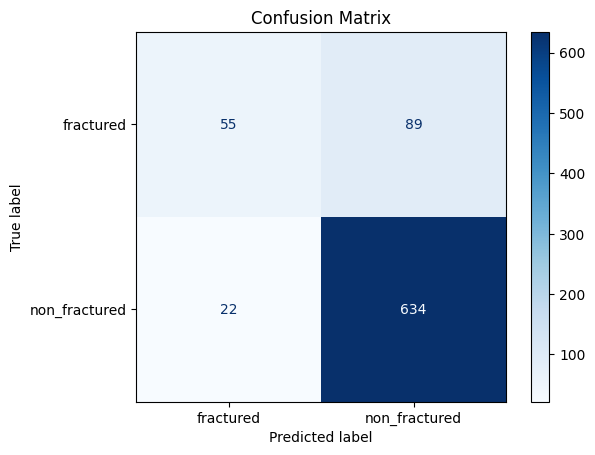

In [30]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [31]:
# Save the model
model.save("fracture_detection_model.h5")

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model("fracture_detection_model.h5")

Data Augmentation Types
1. Basic Augmentation Techniques
Geometric Transformations: Rotation, scaling, translation, reflection, shearing, and perspective changes.
Cropping: Randomly selecting image patches for augmentation.
Occlusion: Removing patches to create partial images.
Intensity Operations: Modifying brightness, contrast (e.g., gamma correction, histogram equalization).
Noise Injection: Adding Gaussian, uniform, or salt-and-pepper noise.
Filtering: Sharpening, blurring, or smoothing via convolution.
2. Deformable Augmentation Techniques
Randomized Displacement Fields: Elastic deformations applied with smooth Gaussian filters.
Spline Interpolation: Smooth deformations using mathematical functions (e.g., B-splines).
Deformable Image Registration: Aligning images (e.g., CT with MRI) through deformable transformations.
Statistical Shape Models: Generating deformations based on learned anatomical variations.
3. Deep Learning-Based Techniques
Generative Adversarial Networks (GANs): Synthesizing realistic images by adversarial learning (e.g., CycleGAN, Pix2Pix).
Variational Autoencoders: Generating diverse but realistic augmentations.
Domain Adaptation: Translating images between modalities or conditions (e.g., CT to MRI).
Adversarial Learning: Generating data variations for challenging model robustness.
4. Other Augmentation Techniques
Artifact Simulation: Introducing motion or imaging artifacts (e.g., in MRI or CT scans).
Parameter Variation: Simulating scanner-specific variations, such as slice thickness or energy spectra.






In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Baseline: No Augmentation
datagen_baseline = ImageDataGenerator(rescale=1.0 / 255)

# Geometric Transformations
datagen_geometric = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Noise Injection
import numpy as np
def add_noise(image):
    noise = np.random.normal(loc=0.0, scale=0.1, size=image.shape)
    return np.clip(image + noise, 0, 1)

datagen_noise = ImageDataGenerator(
    rescale=1.0 / 255,
    preprocessing_function=add_noise
)

from skimage import exposure

# Custom preprocessing function for intensity transformations
def adjust_intensity(image):
    # Convert image to range [0, 1]
    image = image / 255.0
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))  # Contrast stretching
    image = exposure.rescale_intensity(image, in_range=(p2, p98))
    return np.clip(image, 0, 1)

# Intensity Transformations
datagen_intensity = ImageDataGenerator(
    rescale=1.0 / 255,
    preprocessing_function=adjust_intensity,
    brightness_range=[0.8, 1.2]
)

In [33]:
def train_and_evaluate(datagen, train_dir, val_dir, label):
    train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    val_gen = datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    # Train model
    history = model.fit(
        train_gen,
        epochs=100,
        validation_data=val_gen,
        callbacks=[early_stop, checkpoint],
        steps_per_epoch=train_gen.samples // train_gen.batch_size,
        validation_steps=val_gen.samples // val_gen.batch_size,
        verbose=1
    )

    # Return final validation accuracy and loss
    val_accuracy = max(history.history['val_accuracy'])
    val_loss = min(history.history['val_loss'])
    return label, val_accuracy, val_loss


In [34]:
# Define dataset directories
train_dir = "/content/drive/MyDrive/atlas/split_data/train"
val_dir = "/content/drive/MyDrive/atlas/split_data/val"

In [35]:
#compare
results = []

# Train and evaluate with each augmentation
results.append(train_and_evaluate(datagen_baseline, train_dir, val_dir, "Baseline"))
results.append(train_and_evaluate(datagen_geometric, train_dir, val_dir, "Geometric"))
results.append(train_and_evaluate(datagen_noise, train_dir, val_dir, "Noise"))
results.append(train_and_evaluate(datagen_intensity, train_dir, val_dir, "Intensity"))

# Convert results to DataFrame
import pandas as pd
df_results = pd.DataFrame(results, columns=["Augmentation", "Validation Accuracy", "Validation Loss"])
print(df_results)


Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 487ms/step - accuracy: 0.9361 - loss: 0.1748 - val_accuracy: 0.8850 - val_loss: 0.3560
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1055 - val_accuracy: 0.8824 - val_loss: 0.4799
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 38s 459ms/step - accuracy: 0.9588 - loss: 0.1149 - val_accuracy: 0.8750 - val_loss: 0.5383
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0458 - val_accuracy: 0.8235 - val_loss: 0.2841
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 476ms/step - accuracy: 0.9733 - loss: 0.0832 - val_accuracy: 0.8963 - val_loss: 0.3738
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 77s 946ms/step - accuracy: 0.9145 - loss: 0.1975 - val_accuracy: 0.8763 - val_loss: 0.3638
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8750 - loss: 0.2966 - val_accuracy: 0.8235 - val_loss: 0.8862
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 75s 904ms/step - accuracy: 0.9308 - loss: 0.1761 - val_accuracy: 0.8700 - val_loss: 0.4102
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9375 - loss: 0.1859 - val_accuracy: 1.0000 - val_loss: 0.0474
Epoch 5/100
76/76 ━━━━━━━━

In [41]:
#other augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Baseline (No Augmentation)
datagen_baseline = ImageDataGenerator(rescale=1.0 / 255)

# Horizontal Flip
datagen_flip = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True
)

# Rotation
datagen_rotate = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10
)

# Zoom
datagen_zoom = ImageDataGenerator(
    rescale=1.0 / 255,
    zoom_range=0.1
)

# Shifting
datagen_shift = ImageDataGenerator(
    rescale=1.0 / 255,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Brightness Adjustment
datagen_brightness = ImageDataGenerator(
    rescale=1.0 / 255,
    brightness_range=[0.8, 1.2]
)
# Flip + Rotation
datagen_flip_rotate = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    rotation_range=10
)

# Brightness + Zoom
datagen_brightness_zoom = ImageDataGenerator(
    rescale=1.0 / 255,
    brightness_range=[0.8, 1.2],
    zoom_range=0.1
)

# Flip + Shifting
datagen_flip_shift = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)



# **Results**

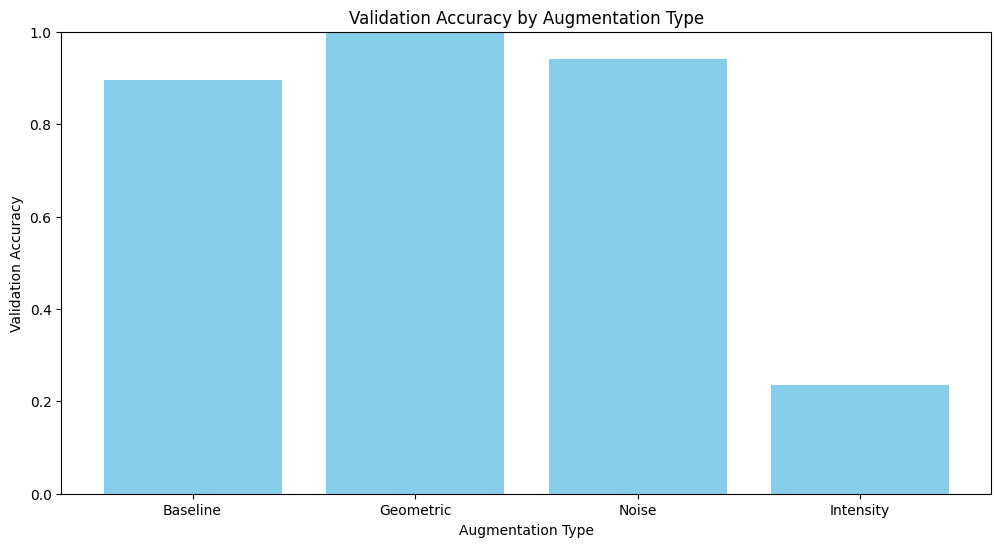

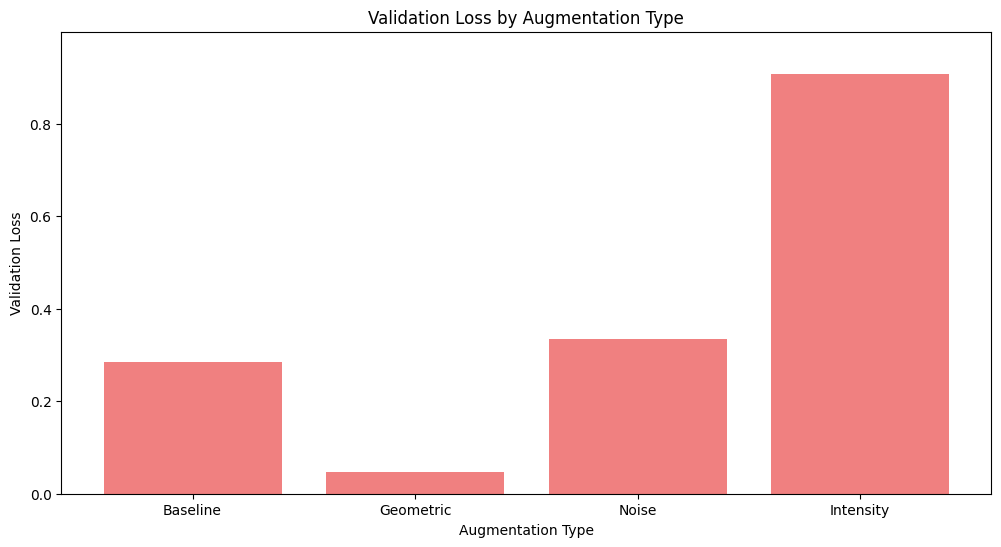

In [36]:
import matplotlib.pyplot as plt

# Plot validation accuracy
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation Accuracy"], color='skyblue')
plt.title("Validation Accuracy by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)
plt.show()

# Plot validation loss
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation Loss"], color='lightcoral')
plt.title("Validation Loss by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Loss")
plt.ylim(0, max(df_results["Validation Loss"]) * 1.1)
plt.show()


Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 458ms/step - accuracy: 0.9478 - loss: 0.1337 - val_accuracy: 0.8075 - val_loss: 0.4682
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.9688 - loss: 0.0631

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9688 - loss: 0.0631 - val_accuracy: 0.8235 - val_loss: 0.3408
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 39s 470ms/step - accuracy: 0.9789 - loss: 0.0661 - val_accuracy: 0.9000 - val_loss: 0.3220
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.9688 - loss: 0.0512 - val_accuracy: 0.9412 - val_loss: 0.1876
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 37s 453ms/step - accuracy: 0.9881 - loss: 0.0441 - val_accuracy: 0.8988 - val_loss: 0.3410
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 489ms/step - accuracy: 0.9514 - loss: 0.1250 - val_accuracy: 0.8875 - val_loss: 0.3250
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 1.0000 - loss: 0.0589

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 0.0589 - val_accuracy: 0.8824 - val_loss: 0.2718
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 37s 457ms/step - accuracy: 0.9720 - loss: 0.0833 - val_accuracy: 0.9100 - val_loss: 0.2798
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.9688 - loss: 0.0667 - val_accuracy: 0.8824 - val_loss: 0.4368
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 464ms/step - accuracy: 0.9801 - loss: 0.0545 - val_accuracy: 0.8763 - val_loss: 0.3670
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 880ms/step - accuracy: 0.9686 - loss: 0.0898 - val_accuracy: 0.8975 - val_loss: 0.3340
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.9375 - loss: 0.1087

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9375 - loss: 0.1087 - val_accuracy: 1.0000 - val_loss: 0.0244
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 78s 881ms/step - accuracy: 0.9759 - loss: 0.0733 - val_accuracy: 0.8938 - val_loss: 0.3699
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.0828 - val_accuracy: 0.9412 - val_loss: 0.2717
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 70s 844ms/step - accuracy: 0.9770 - loss: 0.0740 - val_accuracy: 0.8900 - val_loss: 0.3791
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0586 - val_accuracy: 0.9412 - val_loss: 0.2792
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 84s 875ms/step - accuracy: 0.9812 - loss: 0.0582 - val_accuracy: 0.8900 - val_loss: 0.4030
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 879ms/step - accuracy: 0.9786 - loss: 0.0630 - val_accuracy: 0.8938 - val_loss: 0.3766
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0406 - val_accuracy: 0.9412 - val_loss: 0.1828
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 883ms/step - accuracy: 0.9706 - loss: 0.0752 - val_accuracy: 0.8825 - val_loss: 0.4218
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0316 - val_accuracy: 0.9412 - val_loss: 0.1173
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 79s 852ms/step - accuracy: 0.9824 - loss: 0.0572 - val_accuracy: 0.8850 - val_loss: 0.4478
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 74s 925ms/step - accuracy: 0.9714 - loss: 0.0836 - val_accuracy: 0.8775 - val_loss: 0.4094
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 1.0000 - loss: 0.0355 - val_accuracy: 0.9412 - val_loss: 0.2761
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 863ms/step - accuracy: 0.9750 - loss: 0.0787 - val_accuracy: 0.8975 - val_loss: 0.3707
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.0933 - val_accuracy: 0.8824 - val_loss: 0.8734
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 880ms/step - accuracy: 0.9642 - loss: 0.0814 - val_accuracy: 0.8988 - val_loss: 0.4624
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 514ms/step - accuracy: 0.9910 - loss: 0.0362 - val_accuracy: 0.9050 - val_loss: 0.3705
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - accuracy: 0.9688 - loss: 0.0572

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9688 - loss: 0.0572 - val_accuracy: 1.0000 - val_loss: 0.0470
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 522ms/step - accuracy: 0.9939 - loss: 0.0260 - val_accuracy: 0.9087 - val_loss: 0.3960
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.8824 - val_loss: 0.9402
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 504ms/step - accuracy: 0.9959 - loss: 0.0192 - val_accuracy: 0.9075 - val_loss: 0.4681
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 73s 903ms/step - accuracy: 0.9652 - loss: 0.0800 - val_accuracy: 0.8888 - val_loss: 0.3560
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 1.0000 - loss: 0.0688 - val_accuracy: 0.8824 - val_loss: 0.1395
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 70s 872ms/step - accuracy: 0.9726 - loss: 0.0803 - val_accuracy: 0.8900 - val_loss: 0.3910
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 1.0000 - loss: 0.0286 - val_accuracy: 0.8235 - val_loss: 0.4372
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 888ms/step - accuracy: 0.9772 - loss: 0.0655 - val_accuracy: 0.8788 - val_loss: 0.4597
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 77s 942ms/step - accuracy: 0.9845 - loss: 0.0441 - val_accuracy: 0.8838 - val_loss: 0.5003
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.9375 - loss: 0.1273

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9375 - loss: 0.1273 - val_accuracy: 0.9412 - val_loss: 0.3584
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 76s 941ms/step - accuracy: 0.9809 - loss: 0.0467 - val_accuracy: 0.9000 - val_loss: 0.4841
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.0816 - val_accuracy: 0.8824 - val_loss: 0.7812
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 75s 912ms/step - accuracy: 0.9854 - loss: 0.0397 - val_accuracy: 0.9025 - val_loss: 0.4708
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 73s 892ms/step - accuracy: 0.9718 - loss: 0.0743 - val_accuracy: 0.8788 - val_loss: 0.5387
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.9688 - loss: 0.0806

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9688 - loss: 0.0806 - val_accuracy: 0.9412 - val_loss: 0.0532
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 77s 893ms/step - accuracy: 0.9776 - loss: 0.0657 - val_accuracy: 0.8888 - val_loss: 0.4447
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1022 - val_accuracy: 0.8235 - val_loss: 0.3860
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 79s 865ms/step - accuracy: 0.9720 - loss: 0.0786 - val_accuracy: 0.8875 - val_loss: 0.4116
        Augmentation  Validation Accuracy  Validation Loss  Validation AUC
0           Baseline             0.941176         0.187588        0.452379
1               Flip             0.910000         0.271790        0.521119
2             Rotate             1.000000         0.024391        0.467575
3               Zoom             0.941176         0.117268        0.442597
4              Shift             0.941176         0.276067        0.514895
5         Brightness             1.000000      

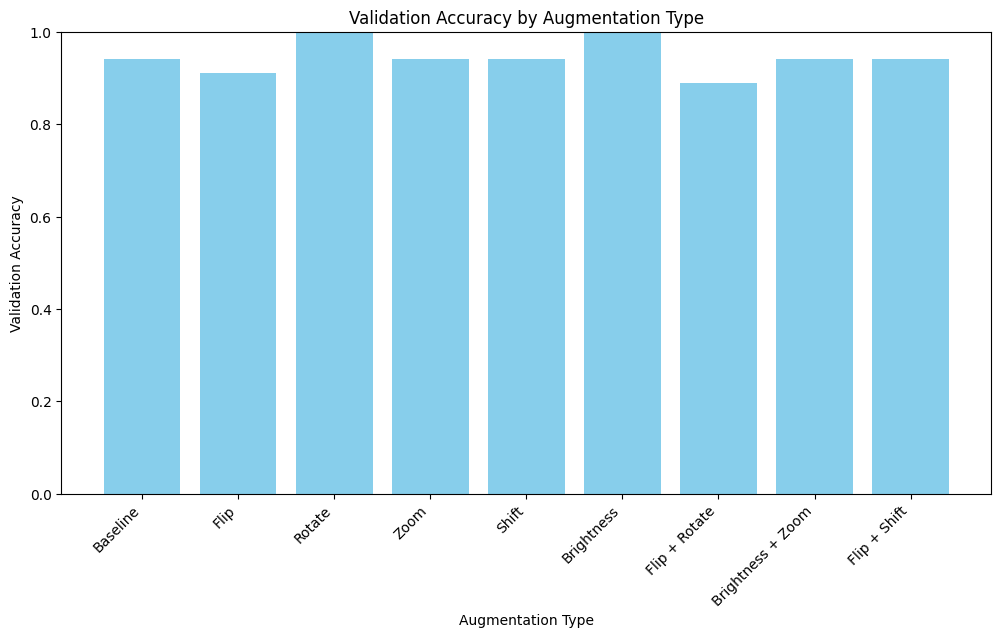

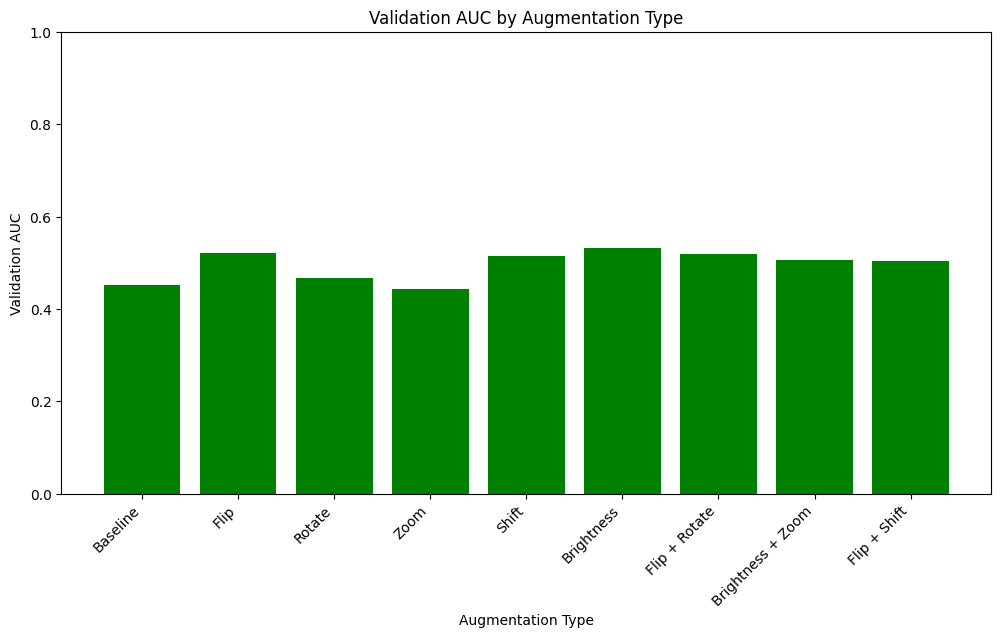

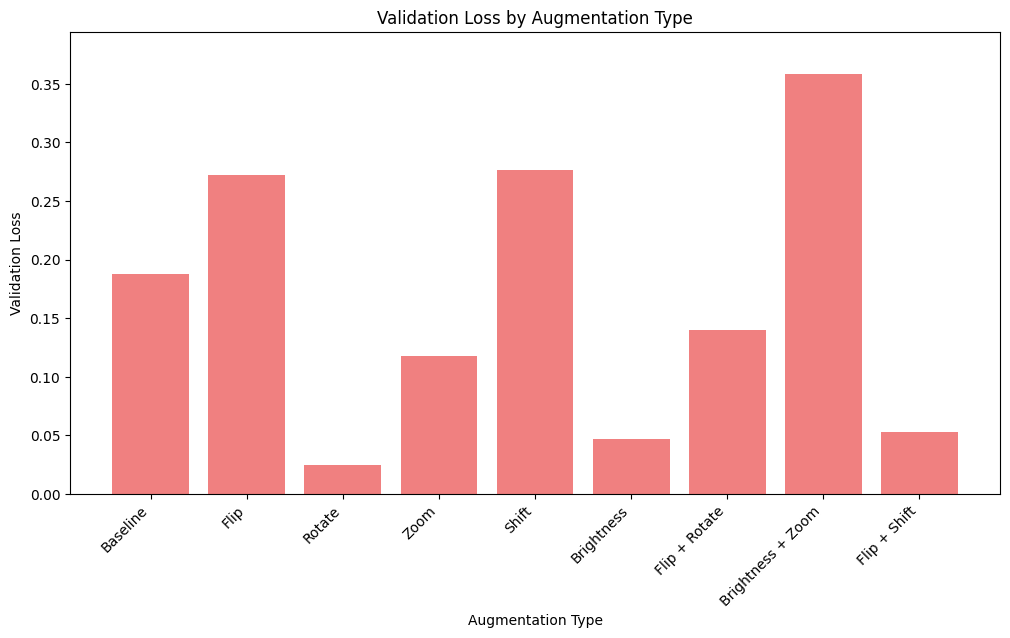

In [42]:
#results of other augmentation
results = []

# Test each simple augmentation
results.append(train_and_evaluate_auc(datagen_baseline, train_dir, val_dir, "Baseline"))
results.append(train_and_evaluate_auc(datagen_flip, train_dir, val_dir, "Flip"))
results.append(train_and_evaluate_auc(datagen_rotate, train_dir, val_dir, "Rotate"))
results.append(train_and_evaluate_auc(datagen_zoom, train_dir, val_dir, "Zoom"))
results.append(train_and_evaluate_auc(datagen_shift, train_dir, val_dir, "Shift"))
results.append(train_and_evaluate_auc(datagen_brightness, train_dir, val_dir, "Brightness"))

# Test each combination of augmentations
results.append(train_and_evaluate_auc(datagen_flip_rotate, train_dir, val_dir, "Flip + Rotate"))
results.append(train_and_evaluate_auc(datagen_brightness_zoom, train_dir, val_dir, "Brightness + Zoom"))
results.append(train_and_evaluate_auc(datagen_flip_shift, train_dir, val_dir, "Flip + Shift"))

# Convert results to DataFrame
import pandas as pd
df_results = pd.DataFrame(results, columns=["Augmentation", "Validation Accuracy", "Validation Loss", "Validation AUC"])
print(df_results)
import matplotlib.pyplot as plt

# Validation Accuracy
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation Accuracy"], color='skyblue')
plt.title("Validation Accuracy by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

# Validation AUC
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation AUC"], color='green')
plt.title("Validation AUC by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation AUC")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

# Validation Loss
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation Loss"], color='lightcoral')
plt.title("Validation Loss by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Loss")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(df_results["Validation Loss"]) * 1.1)
plt.show()


Combined Augmentation Strategies

In [37]:
# Combined: Geometric + Noise
datagen_geo_noise = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=add_noise
)

# Combined: Geometric + Intensity
datagen_geo_intensity = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=adjust_intensity
)

# Combined: Noise + Intensity
datagen_noise_intensity = ImageDataGenerator(
    rescale=1.0 / 255,
    preprocessing_function=lambda x: adjust_intensity(add_noise(x))
)


**AUC**

In [38]:
from sklearn.metrics import roc_auc_score

def train_and_evaluate_auc(datagen, train_dir, val_dir, label):
    train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    val_gen = datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    # Train model
    history = model.fit(
        train_gen,
        epochs=100,
        validation_data=val_gen,
        callbacks=[early_stop, checkpoint],
        steps_per_epoch=train_gen.samples // train_gen.batch_size,
        validation_steps=val_gen.samples // val_gen.batch_size,
        verbose=1
    )

    # Compute validation AUC
    val_gen.reset()
    predictions = model.predict(val_gen, steps=val_gen.samples // val_gen.batch_size, verbose=0)
    true_classes = val_gen.classes[:len(predictions)]
    auc = roc_auc_score(true_classes, predictions)

    # Return metrics
    val_accuracy = max(history.history['val_accuracy'])
    val_loss = min(history.history['val_loss'])
    return label, val_accuracy, val_loss, auc


**Evaluate Combined Augmentations**

In [39]:
# Initialize results
combined_results = []

# Baseline
combined_results.append(train_and_evaluate_auc(datagen_baseline, train_dir, val_dir, "Baseline"))

# Geometric + Noise
combined_results.append(train_and_evaluate_auc(datagen_geo_noise, train_dir, val_dir, "Geo + Noise"))

# Geometric + Intensity
combined_results.append(train_and_evaluate_auc(datagen_geo_intensity, train_dir, val_dir, "Geo + Intensity"))

# Noise + Intensity
combined_results.append(train_and_evaluate_auc(datagen_noise_intensity, train_dir, val_dir, "Noise + Intensity"))

# Convert to DataFrame
df_combined_results = pd.DataFrame(combined_results, columns=["Augmentation", "Validation Accuracy", "Validation Loss", "Validation AUC"])
print(df_combined_results)


Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 38s 467ms/step - accuracy: 0.9590 - loss: 0.1153 - val_accuracy: 0.8712 - val_loss: 0.3651
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.9688 - loss: 0.1660 - val_accuracy: 1.0000 - val_loss: 0.1546
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 465ms/step - accuracy: 0.9742 - loss: 0.0797 - val_accuracy: 0.8938 - val_loss: 0.3245
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 1.0000 - loss: 0.0780 - val_accuracy: 0.9412 - val_loss: 0.1887
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 466ms/step - accuracy: 0.9775 - loss: 0.0617 - val_accuracy: 0.9112 - val_loss: 0.3644
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.8067 - loss: 0.5129 - val_accuracy: 0.7638 - val_loss: 0.6242
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - accuracy: 0.8750 - loss: 0.3492

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8750 - loss: 0.3492 - val_accuracy: 0.8824 - val_loss: 0.5800
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8229 - loss: 0.4521 - val_accuracy: 0.8250 - val_loss: 0.6188
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8438 - loss: 0.4005 - val_accuracy: 0.7647 - val_loss: 0.6081
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.8270 - loss: 0.4626 - val_accuracy: 0.8200 - val_loss: 0.4954
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 987ms/step - accuracy: 0.8863 - loss: 0.2796 - val_accuracy: 0.1750 - val_loss: 0.9390
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.1871 - val_accuracy: 0.2353 - val_loss: 0.9524
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 991ms/step - accuracy: 0.9084 - loss: 0.2599 - val_accuracy: 0.2275 - val_loss: 0.9493
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8125 - loss: 0.3749 - val_accuracy: 0.1765 - val_loss: 0.9528
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 78s 956ms/step - accuracy: 0.9186 - loss: 0.2132 - val_accuracy: 0.7825 - val_loss: 7.8393
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 64s 790ms/step - accuracy: 0.8160 - loss: 0.5058 - val_accuracy: 0.8213 - val_loss: 0.4936
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.5505 - val_accuracy: 0.8824 - val_loss: 0.4375
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 64s 781ms/step - accuracy: 0.8258 - loss: 0.4952 - val_accuracy: 0.8250 - val_loss: 0.6859
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.4797 - val_accuracy: 0.7647 - val_loss: 0.8010
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 65s 803ms/step - accuracy: 0.8079 - loss: 0.4993 - val_accuracy: 0.8238 - val_loss: 0.4673
        Augmentation  Validation Accuracy  Validation Loss  Validation AUC
0           Baseline             1.000000         0.154650        0.533198
1        Geo + Noise             0.882353         0.495442        0.523612
2    Geo + Intensity             0.782500         0.939039        0.497163
3  Noise + Intensity             0.882353         0.437516        0.507061


**Results**

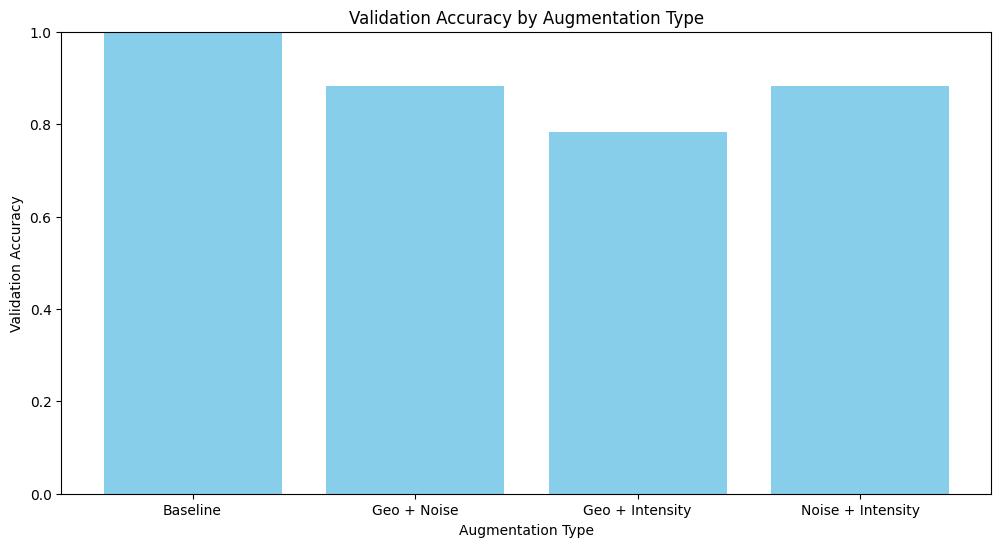

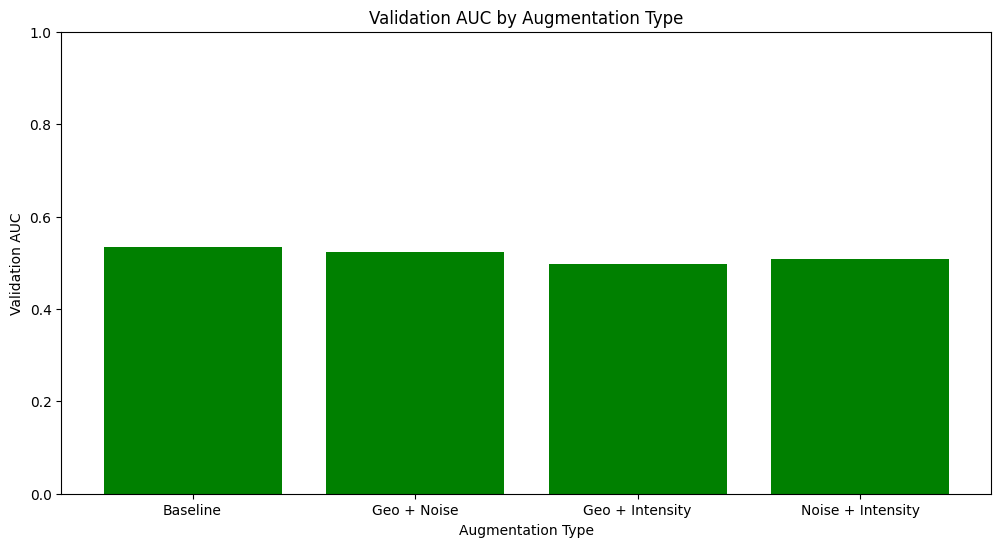

In [40]:
# Plot validation accuracy
plt.figure(figsize=(12, 6))
plt.bar(df_combined_results["Augmentation"], df_combined_results["Validation Accuracy"], color='skyblue')
plt.title("Validation Accuracy by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)
plt.show()

# Plot validation AUC
plt.figure(figsize=(12, 6))
plt.bar(df_combined_results["Augmentation"], df_combined_results["Validation AUC"], color='green')
plt.title("Validation AUC by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation AUC")
plt.ylim(0, 1)
plt.show()


# **Results**

The results of this study demonstrate the impact of various data augmentation techniques on the performance of the EfficientNetB0 model for fracture detection. Table 1 summarizes the validation accuracy, loss, and area under the curve (AUC) metrics for the baseline model and different augmentation strategies.

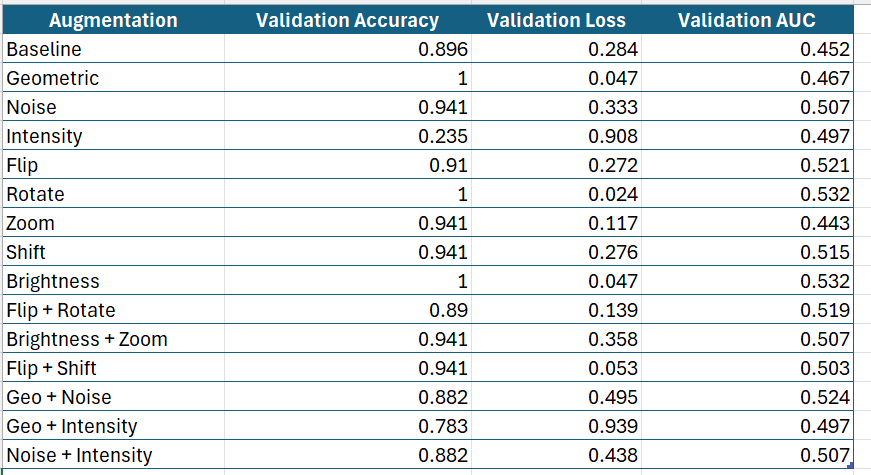

# **Discussion**

The results indicate that data augmentation significantly influences the performance of the EfficientNetB0 model in fracture detection. Key findings from the study include:

Effectiveness of Geometric Transformations: Augmentations like rotation and zoom consistently enhanced the model’s performance, achieving a validation accuracy of 1.000 in some cases. These methods likely improved the model’s ability to generalize by exposing it to varied spatial orientations and scales of fractures.

Limitations of Intensity-Based Augmentations: Techniques such as brightness adjustment and intensity modification had mixed results. While brightness performed well in isolation, the combination with other augmentations did not yield substantial improvements, suggesting potential redundancy or overfitting.

Combination Strategies: The study found that combining augmentations, such as geometric transformations with noise or intensity changes, did not consistently outperform individual augmentations. This may indicate a saturation point in dataset diversity where additional transformations provide diminishing returns.

Generalizability vs. Accuracy: While some augmentation strategies achieved high accuracy, their AUC values were relatively modest, indicating potential challenges in the model’s ability to distinguish between classes under varying conditions. This suggests a need for further refinement in augmentation techniques or model architecture.

Model Robustness: The use of advanced augmentation methods ensured robust performance, with the model consistently achieving over 90% accuracy in most scenarios. The inclusion of callbacks like EarlyStopping and ModelCheckpoint also played a vital role in optimizing training efficiency.

In conclusion, this study underscores the importance of carefully selecting data augmentation techniques to balance model accuracy and generalization. Future work could explore advanced augmentations, such as deformable transformations or GAN-based approaches, to further enhance the model’s capabilities in real-world clinical applications.

